# **Customer Segmentaion**

*   Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

*   In this project, the idea was to identify segments of customers to target the potential user base using k-means clustering.

* The dataset has total of 5 features and 200 entries.

*   The dataset includes the following features:

  1. Customer ID

  2. Customer Gender

  3. Customer Age

  4. Annual Income of the customer (in Thousand Dollars)

  5. Spending score of the customer (based on customer behaviour and spending nature)


# **Code part:**

**Importing the necessary libraries**

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import matplotlib
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("numpy: ",np.__version__)
print("pandas: ",pd.__version__)
print("matplotlib.pyplot: ",matplotlib.__version__)
print("seaborn: ",sns.__version__)

numpy:  1.22.4
pandas:  1.5.3
matplotlib.pyplot:  3.7.1
seaborn:  0.12.2


In [ ]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, lightgbm, mlxtend, qudida, sklearn-pandas, yellowbrick


**Reading the excel file and analyzing the data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/customer-segmentation-dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Creating a copy of the dataset

df_copy = df.copy()
df_copy.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df_copy.shape

(200, 5)

In [ ]:
# Dropping the CustomerID column as that does not seem relevant to the context.

df_copy.drop(['CustomerID'], axis = 1, inplace = True)
df_copy.shape

(200, 4)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
## Checking for null values, if any

df_copy.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df_copy.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
# Creating a list of those columns which has numerical data

numerical_col = [x for x in df_copy.columns if df_copy[x].dtypes != 'O']
numerical_col

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [ ]:
# Creating a list of those columns which has categorical data

categorical_col = [x for x in df_copy.columns if df_copy[x].dtypes == 'O']
categorical_col

['Gender']

Plotting curves to analyze the distribution of Age, Annual Income and Spending Score over the entire data.

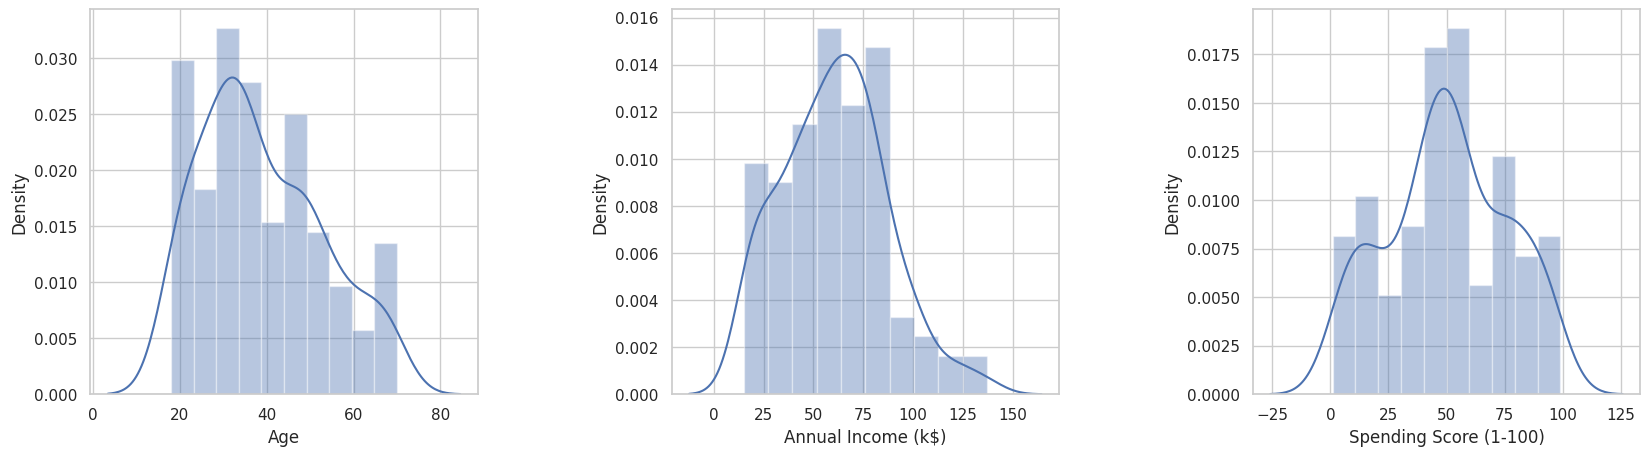

In [ ]:
plt.figure(figsize = (20,5))
n = 1
for col in numerical_col:
  plt.subplot(1,3,n)
  sns.distplot(df_copy[col], bins = 10)
  plt.subplots_adjust(hspace = -0.5, wspace = 0.5)
  n += 1

Distribution of male and female population in the dataset.

<Axes: >

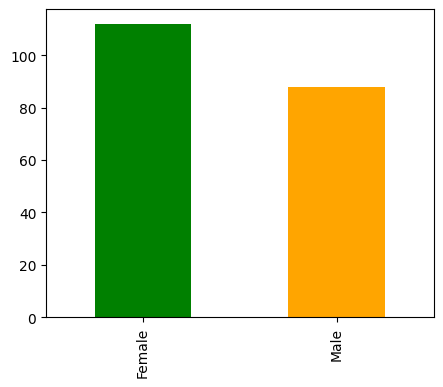

In [ ]:
plt.figure(figsize=(5,4))
df_copy['Gender'].value_counts().plot(kind = 'bar', color = ['green', 'orange'])

From the above plot we can see that the female population overweighs the male counterpart and thus, we can conclude that the shop/mall has higher female visit than that of male.

Now, using box plot to better visualize the distribution range of different numerical data.

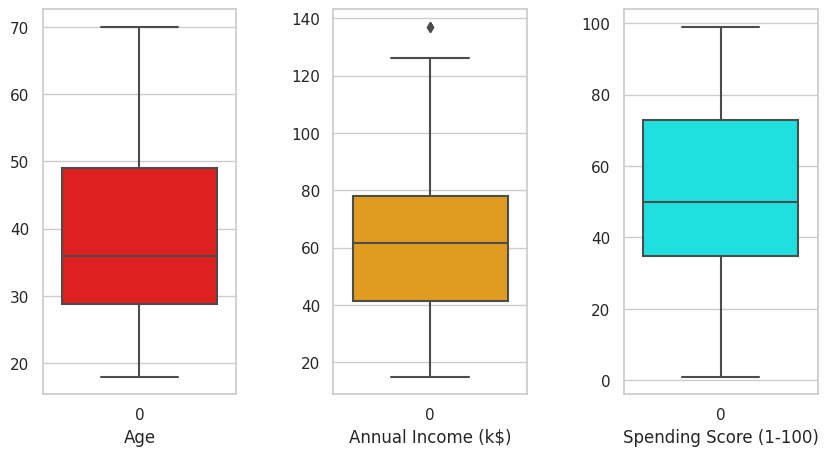

In [ ]:
plt.figure(figsize = (10,5))
n = 1
c = ['red','orange','cyan']
for col in numerical_col:
  plt.subplot(1,3,n)
  sns.boxplot(data = df_copy[col], orient = 'v', color = c[n-1])
  plt.subplots_adjust(hspace = -0.5, wspace = 0.5)
  plt.xlabel(col)
  n +=1

plt.show()

Violin plot to visualize the distribution of gender over different features.

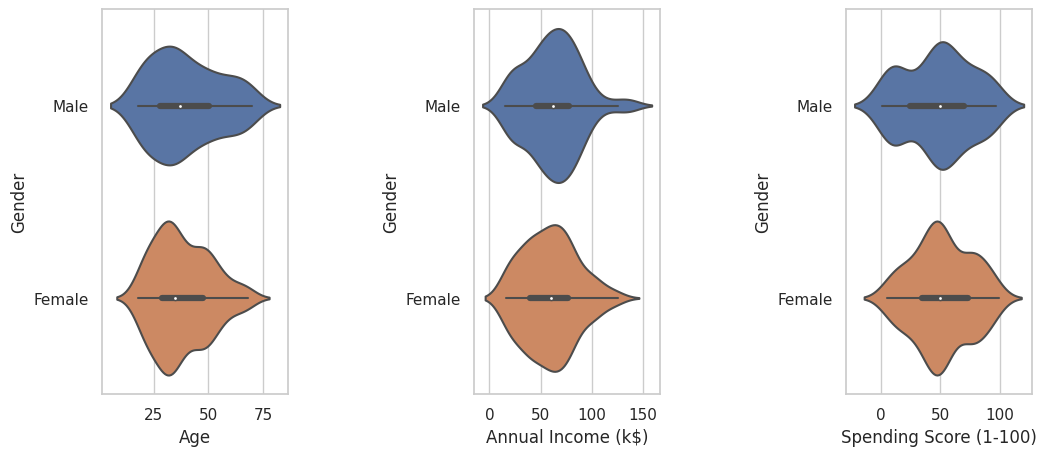

In [ ]:
plt.figure(figsize = (12,5))
n = 1
for col in numerical_col:
  plt.subplot(1,3,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace = -1, wspace = 1)
  sns.violinplot(x = col, y = 'Gender', data = df_copy)
  plt.ylabel('Gender')
  n += 1
plt.show()

Now, we are visualizing the distribution of male population in different age groups.

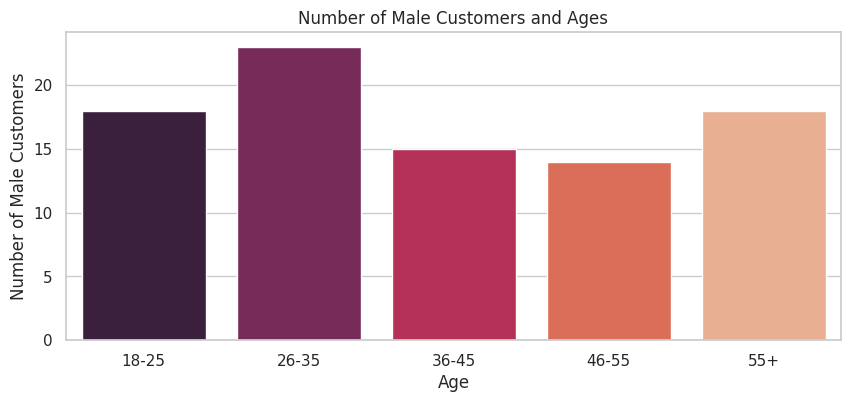

In [ ]:
age18_25 = df_copy[(df_copy.Age <= 25) & (df_copy.Age >= 18) & (df_copy.Gender == 'Male')]
age26_35 = df_copy[(df_copy.Age <= 35) & (df_copy.Age >= 26) & (df_copy.Gender == 'Male')]
age36_45 = df_copy[(df_copy.Age <= 45) & (df_copy.Age >= 36) & (df_copy.Gender == 'Male')]
age46_55 = df_copy[(df_copy.Age <= 55) & (df_copy.Age >= 46) & (df_copy.Gender == 'Male')]
age55above = df_copy[(df_copy.Age >= 56) & (df_copy.Gender == 'Male')]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25),len(age26_35),len(age36_45),len(age46_55),len(age55above)]

plt.figure(figsize=(10,4))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Male Customers and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Male Customers")
plt.show()

From the above plot, we can clearly see that the 26-35 age group has the highest number of male population among other age groups.


In a similar manner for female population.

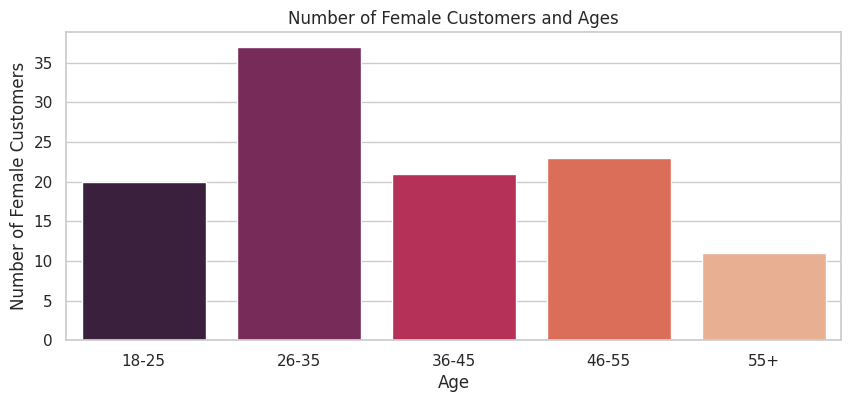

In [ ]:
age18_25 = df_copy[(df_copy.Age <= 25) & (df_copy.Age >= 18) & (df_copy.Gender == 'Female')]
age26_35 = df_copy[(df_copy.Age <= 35) & (df_copy.Age >= 26) & (df_copy.Gender == 'Female')]
age36_45 = df_copy[(df_copy.Age <= 45) & (df_copy.Age >= 36) & (df_copy.Gender == 'Female')]
age46_55 = df_copy[(df_copy.Age <= 55) & (df_copy.Age >= 46) & (df_copy.Gender == 'Female')]
age55above = df_copy[(df_copy.Age >= 56) & (df_copy.Gender == 'Female')]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25),len(age26_35),len(age36_45),len(age46_55),len(age55above)]

plt.figure(figsize=(10,4))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Female Customers and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Female Customers")
plt.show()

From the above plot, we can clearly see that the 26-35 age group has the highest number of female population in comparison to other age groups.

Violing plot to understand the distribution of age over the population.

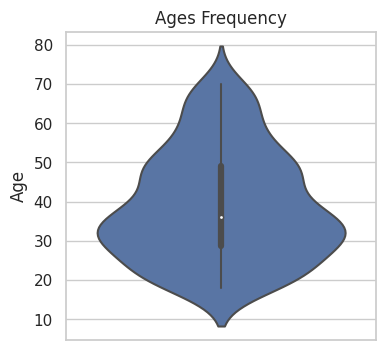

In [ ]:
plt.figure(figsize=(4,4))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

The above violing plot states that our majority population lies in 30-40 age group as it has the highest density.

Now, dividing the population in different age groups to better understand the distribution.

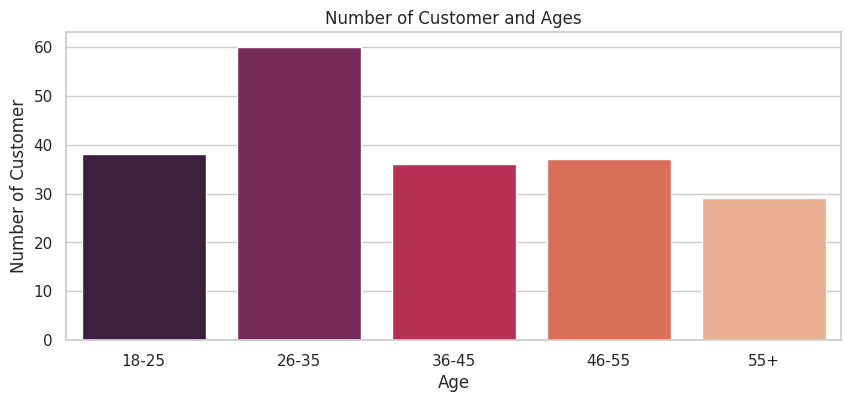

In [ ]:
age18_25 = df_copy.Age[(df_copy.Age <= 25) & (df_copy.Age >= 18)]
age26_35 = df_copy.Age[(df_copy.Age <= 35) & (df_copy.Age >= 26)]
age36_45 = df_copy.Age[(df_copy.Age <= 45) & (df_copy.Age >= 36)]
age46_55 = df_copy.Age[(df_copy.Age <= 55) & (df_copy.Age >= 46)]
age55above = df_copy.Age[df_copy.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(10,4))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Analyzing the speding score over the different age groups.

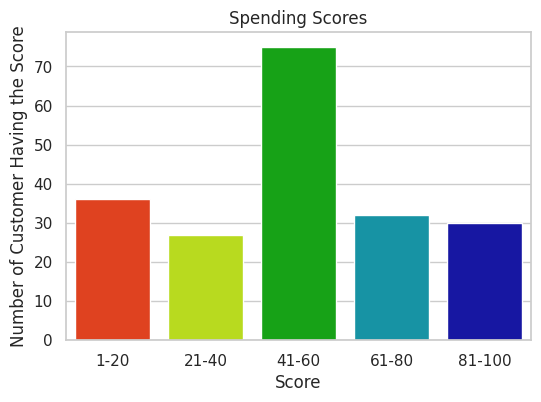

In [ ]:
ss1_20 = df_copy["Spending Score (1-100)"][(df_copy["Spending Score (1-100)"] >= 1) & (df_copy["Spending Score (1-100)"] <= 20)]
ss21_40 = df_copy["Spending Score (1-100)"][(df_copy["Spending Score (1-100)"] >= 21) & (df_copy["Spending Score (1-100)"] <= 40)]
ss41_60 = df_copy["Spending Score (1-100)"][(df_copy["Spending Score (1-100)"] >= 41) & (df_copy["Spending Score (1-100)"] <= 60)]
ss61_80 = df_copy["Spending Score (1-100)"][(df_copy["Spending Score (1-100)"] >= 61) & (df_copy["Spending Score (1-100)"] <= 80)]
ss81_100 = df_copy["Spending Score (1-100)"][(df_copy["Spending Score (1-100)"] >= 81) & (df_copy["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(6,4))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

Thus, 41-60 age group population has the highest spending score.

Analyzing the annual income over the different age groups.

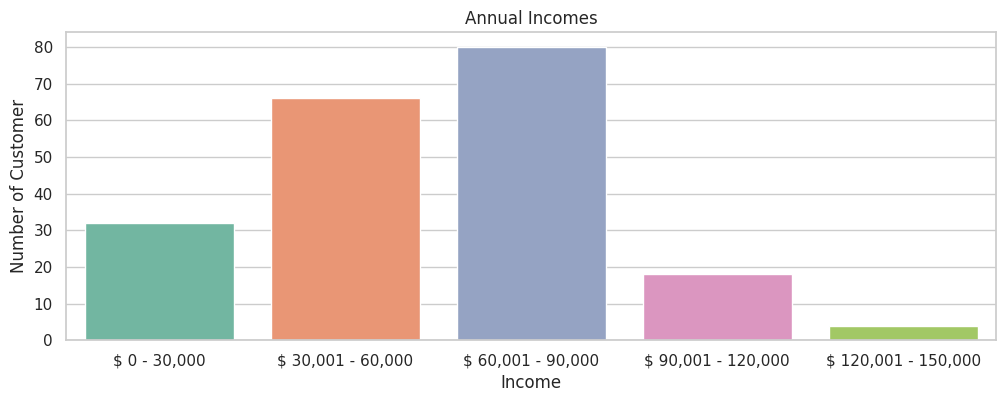

In [ ]:
ai0_30 = df_copy["Annual Income (k$)"][(df_copy["Annual Income (k$)"] >= 0) & (df_copy["Annual Income (k$)"] <= 30)]
ai31_60 = df_copy["Annual Income (k$)"][(df_copy["Annual Income (k$)"] >= 31) & (df_copy["Annual Income (k$)"] <= 60)]
ai61_90 = df_copy["Annual Income (k$)"][(df_copy["Annual Income (k$)"] >= 61) & (df_copy["Annual Income (k$)"] <= 90)]
ai91_120 = df_copy["Annual Income (k$)"][(df_copy["Annual Income (k$)"] >= 91) & (df_copy["Annual Income (k$)"] <= 120)]
ai121_150 = df_copy["Annual Income (k$)"][(df_copy["Annual Income (k$)"] >= 121) & (df_copy["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(12,4))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

The above bar plot give insight that the majority customer has the income of 60,001-90,000 dollars.

Now, we are ananlyzing the correlation among different numerical variables using heatmap.

In [ ]:
df_copy.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.011537,-0.327227
Annual Income (k$),-0.011537,1.000000,0.009930
Spending Score (1-100),-0.327227,0.009930,1.000000


<Axes: >

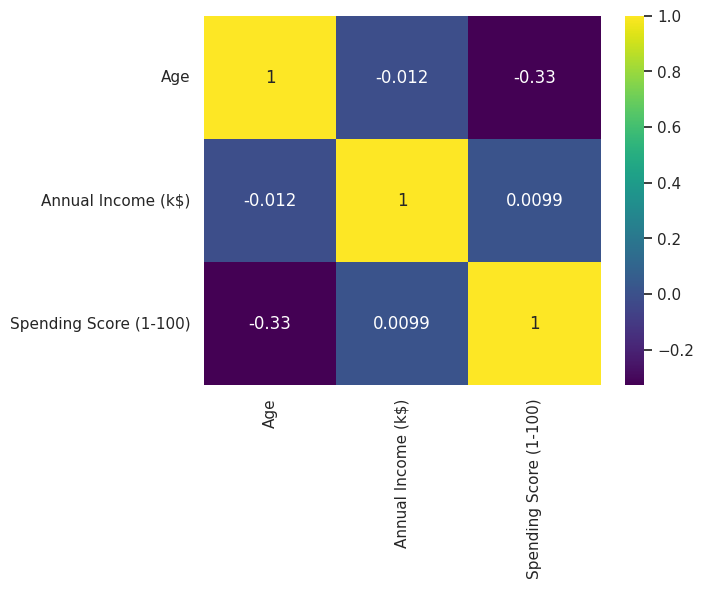

In [ ]:
sns.heatmap(df_copy.corr(), annot = True, cmap = 'viridis')

From the above heatmap, we can say that the features age and spending score has the highest correlation (negatively correlated). Thus, individuals with higher age has the lower spending score and vice-versa.

# **K-Means Clustering**

Clustering based on 2 features. First, we work with two features only, age and annual income.

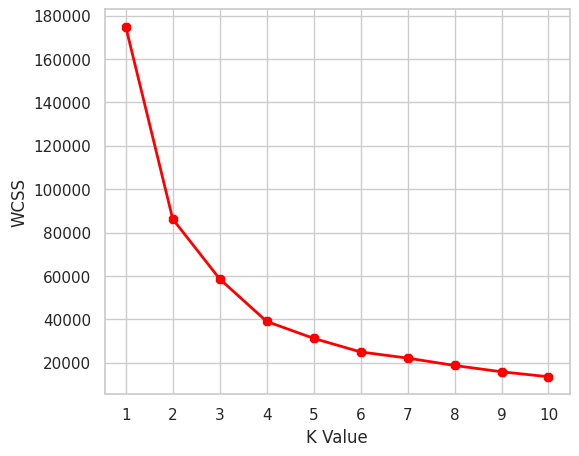

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_copy.iloc[:,[1,2]])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

By using elbow method, we tried to find the optimum number of cluster. From the above, graph we choose the number of clusters as 5.

In [ ]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(df_copy.iloc[:,[1,2]])

print(labels)

[2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2
 2 2 2 1 2 1 2 1 2 1 2 2 2 1 2 2 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 1 1 1 1
 1 4 1 4 4 1 1 4 1 1 4 1 1 4 4 1 1 4 1 4 4 4 1 4 1 4 4 1 1 4 1 4 1 1 1 1 1
 4 4 4 4 4 1 0 0 0 4 0 0 0 4 0 0 0 0 0 0 0 4 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
kmeans.cluster_centers_

array([[ 56.51923077,  49.23076923],
       [ 37.69642857,  78.51785714],
       [ 29.53658537,  27.24390244],
       [ 36.6       , 109.275     ],
       [ 25.06451613,  59.48387097]])

Plotting the different data points.

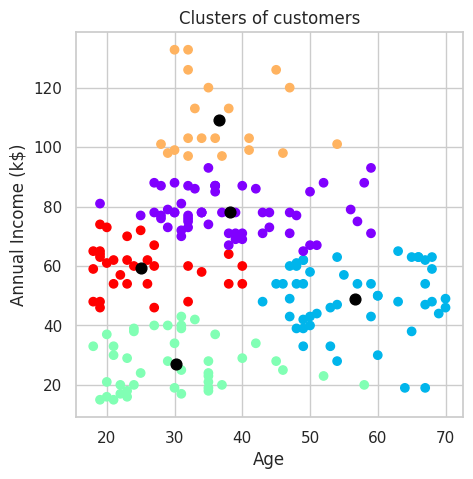

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(df_copy['Age'], df_copy['Annual Income (k$)'], c= kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black', s = 60)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Clusters of customers')
plt.show()

Similarly for other two features annual income and spending score.

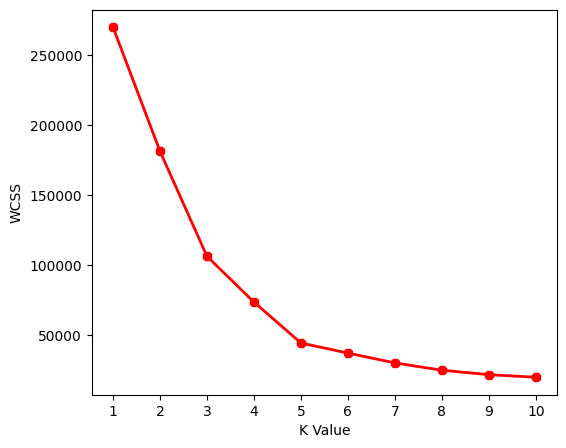

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_copy.iloc[:,[2,3]])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(df_copy.iloc[:,[2,3]])

print(labels)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 3 1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 4 2 3 2 4 2 4 2 3 2 4 2 4 2 4 2 4 2 3 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [ ]:
kmeans.cluster_centers_

array([[88.07857143, 17.11428571],
       [86.42948718, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

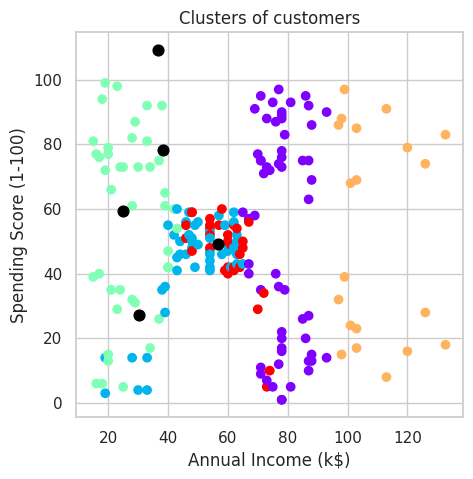

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(df_copy['Annual Income (k$)'], df_copy['Spending Score (1-100)'], c = kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'black', s = 60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of customers')
plt.show()

Now, for the remaining two features namely, Age and Spending score.

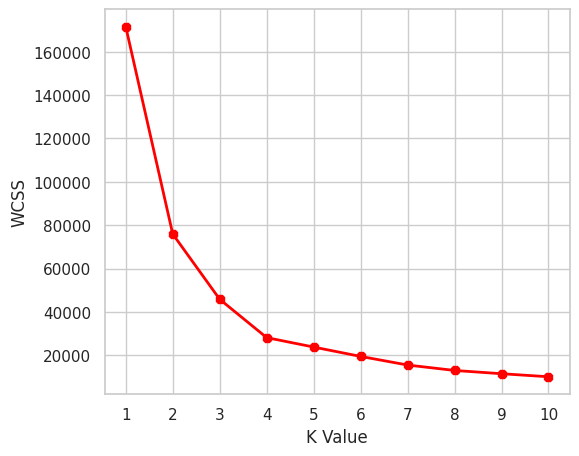

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_copy.iloc[:,[1,3]])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(df_copy.iloc[:,[1,3]])

print(labels)

[3 2 4 2 3 2 4 2 1 2 1 2 1 2 4 2 3 3 1 2 3 2 1 2 1 2 1 3 4 2 1 2 1 2 1 2 4
 2 4 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 4 2 0 2 1 2 1 2 3 2 4 2 1 2 4 2 1 2 3 2 4 2 0 2
 4 2 1 2 1 2 1 2 4 2 4 2 0 2 4 2 1 2 4 2 4 3 4 2 4 2 1 2 1 2 1 2 4 2 1 2 0
 2 1 2 4 2 4 2 4 2 1 2 1 2 4 2]


In [ ]:
kmeans.cluster_centers_

array([[55.40816327, 48.04081633],
       [51.88461538, 15.30769231],
       [30.1754386 , 82.35087719],
       [27.42222222, 49.82222222],
       [32.69565217, 15.30434783]])

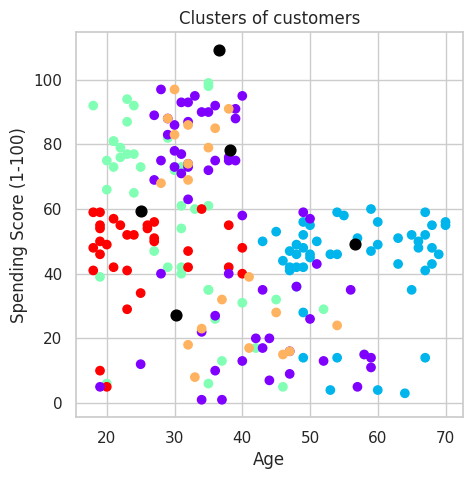

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(df_copy['Age'], df_copy['Spending Score (1-100)'], c = kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'black', s = 60)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of customers')
plt.show()

Now, we shall be working on 3 types of data. Apart from the spending score and annual income of customers, we shall also take in the age of the customers.

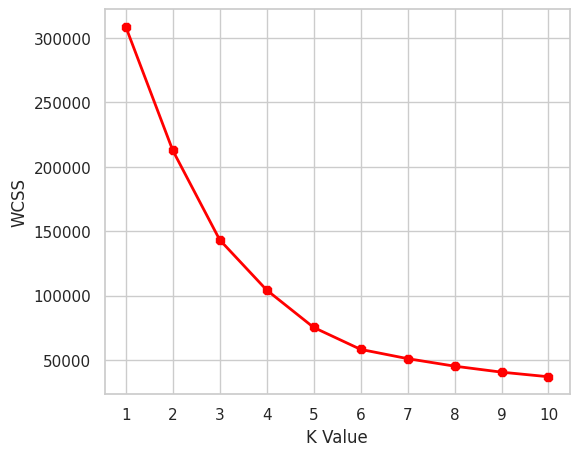

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_copy.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(df_copy.iloc[:,1:])

print(labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [ ]:
print(kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]]


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


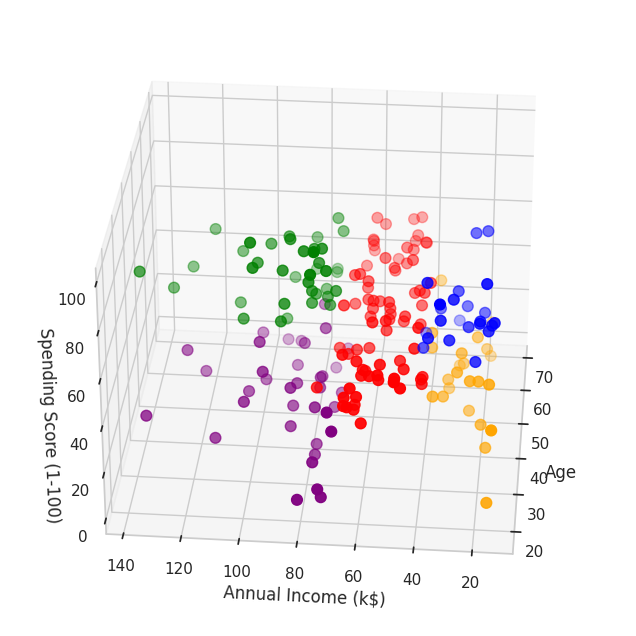

In [ ]:
df_copy['label'] = kmeans.fit_predict(df_copy.iloc[:,1:])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_copy.Age[df_copy.label == 0], df_copy["Annual Income (k$)"][df_copy.label == 0], df_copy["Spending Score (1-100)"][df_copy.label == 0], c='blue', s=60)
ax.scatter(df_copy.Age[df_copy.label == 1], df_copy["Annual Income (k$)"][df_copy.label == 1], df_copy["Spending Score (1-100)"][df_copy.label == 1], c='red', s=60)
ax.scatter(df_copy.Age[df_copy.label == 2], df_copy["Annual Income (k$)"][df_copy.label == 2], df_copy["Spending Score (1-100)"][df_copy.label == 2], c='green', s=60)
ax.scatter(df_copy.Age[df_copy.label == 3], df_copy["Annual Income (k$)"][df_copy.label == 3], df_copy["Spending Score (1-100)"][df_copy.label == 3], c='orange', s=60)
ax.scatter(df_copy.Age[df_copy.label == 4], df_copy["Annual Income (k$)"][df_copy.label == 4], df_copy["Spending Score (1-100)"][df_copy.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()


Now, we got a 3D plot and if we want to know the Customer IDs, we can do that too.

In [ ]:
# Adding the CustomerID column again to the dataframe.

df_copy['CustomerID'] = df['CustomerID']
df_copy = df_copy.iloc[:, [5,0,1,2,3,4]]

In [ ]:
df_copy.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [ ]:
# Making seperate dataframe for the different labels of customers

cst1 = df_copy[df_copy.label == 0]
cst2 = df_copy[df_copy.label == 1]
cst3 = df_copy[df_copy.label == 2]
cst4 = df_copy[df_copy.label == 3]
cst5 = df_copy[df_copy.label == 4]

In [ ]:
cst1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0


In [ ]:
# Now, printing the list of Customer IDs of different labels and their respective frequency.

print('Number of customer in 1st group =', len(cst1))
print('They are -', cst1["CustomerID"].values)
print("--------------------------------------------------------------------------------------------")
print('Number of customer in 2nd group =', len(cst2))
print('They are -', cst2["CustomerID"].values)
print("--------------------------------------------------------------------------------------------")
print('Number of customer in 3rd group =', len(cst3))
print('They are -', cst3["CustomerID"].values)
print("--------------------------------------------------------------------------------------------")
print('Number of customer in 4th group =', len(cst4))
print('They are -', cst4["CustomerID"].values)
print("--------------------------------------------------------------------------------------------")
print('Number of customer in 5th group =', len(cst5))
print('They are -', cst5["CustomerID"].values)
print("--------------------------------------------------------------------------------------------")

Number of customer in 1st group = 23
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46]
--------------------------------------------------------------------------------------------
Number of customer in 2nd group = 79
They are - [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 127 143]
--------------------------------------------------------------------------------------------
Number of customer in 3rd group = 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------------------------------------------------------
Number of customer in 4t

From the above list of customers we can say that 2nd group of customers have the highest density. So, this is how we used K-Means clustering algorithm to understand customer data. K-Means is a good clustering algorithm for unsupervised learning. It is also easy to use, fast and efficient in terms of computational cost.